# Part 4: Report

>**What features did you use, and why did you use them? You need to be able to say something more about each feature than just "to satisfy the lab requirements". You can discuss how they relate to your assumptions about differences, what you saw in the texts (if you looked at some), or any statistical analyses you did to help identify features. You will lose points here if there is no rational basis for your selection of features.**

We developed a set of 14 features designed to distinguish between Asian and European learners of English. These features are the result of our collaborative research, drawing on lecture notes, extensive web searches, and insights from generative AI. Our approach is primarily grounded in the structural differences between languages (such as sentence structure and cultural context), as well as theoretical foundations in second language acquisition and cross-linguistic transfer effects (translanguaging).

### 1. Lexicon-Based Features

`asian_top_word_match` (Boolean)

This feature identifies whether 2 or more of the top 3 most frequent nouns in a text match our specific Asian lexicon (China, Korea, Japan, Tokyo, Beijing, Seoul, etc.). The rationale stems from the observation that learners often write about culturally familiar topics. Asian learners frequently discuss their home countries, cities, and cultural contexts in diary entries, whereas European learners tend to reference different geographic and cultural subjects. We implemented this by extracting the 3 most common nouns using POS tagging and validating them against a curated Asian-specific lexicon.

`Religious_Feature` (Boolean)

This feature flags the presence of religious vocabulary (Catholic, Christ, God, church, pray, angel, holy, spirit, devil). European learners, particularly those from Spanish and French backgrounds, often come from predominantly Catholic or Christian cultural contexts. We hypothesized that this background would manifest in more frequent references to religious concepts in their writing compared to Asian learners, who come from diverse religious backgrounds that may include Buddhism, Confucianism, and Shinto traditions.

### 2. Part-of-Speech Ratio Features

`article_ratio`

This feature measures the frequency of articles (a, an, the) normalized by total words. This metric addresses a fundamental typological difference: Asian languages such as Chinese, Japanese, and Korean generally lack grammatical articles, making correct article usage a persistent challenge for Asian ESL learners. In contrast, European Romance languages (like Spanish and French) possess article systems similar to English, facilitating a positive transfer. We expected Asian learners to systematically underuse articles compared to their European counterparts.

`pronoun_density`

This feature captures the ratio of pronouns (personal and possessive) to total words. The rationale lies in cross-cultural differences in discourse structure and communication styles. Asian cultures often lean toward context-dependent, "high-context" communication where subjects and pronouns are dropped when they are understood from the situation. Conversely, European languages usually require explicit subjects and pronouns. We anticipate that these fundamental differences in discourse organization will manifest in learner writing patterns.

`preposition_ratio`

This feature measures preposition frequency normalized by text length. Preposition systems differ dramatically across language families. While Asian languages often use postpositions or case markers, European Romance languages utilize preposition systems similar to English. For example, Spanish learners can draw on cognates like "de" (of/from) and "en" (in/on), whereas Asian learners must acquire an entirely new grammatical category. This systematic difference should produce measurable transfer effects.

`modal_verb_ratio`

This feature tracks the frequency of modal verbs (can, could, should, would, may, might, must). Modal systems vary significantly across languages in both form and meaning. Romance languages have relatively direct modal equivalents (e.g., Spanish "poder," French "pouvoir"), while Asian languages express modality through different mechanisms, such as auxiliary verbs or adverbs. We expect these typological differences to influence how modal verbs are used in English writing.

`adjective_ratio`

This feature measures adjective frequency to reflect descriptive writing preferences. Romance languages possess rich adjectival systems with gender and number agreement rules, meaning adjectives play a central role in their expressive capabilities. Asian languages handle modification differently, often using stative verbs where English uses adjectives. We hypothesized that these L1 differences would transfer to English writing, affecting the frequency and distribution of adjective usage.

### 3. Statistical Text Features

#### Sentence-Level Features

`sent_per_100_tokens`

This feature measures sentence density: the number of sentences per 100 word tokens. It captures how writers segment ideas into sentences, which can reflect stylistic preferences and L1 transfer. We normalize by tokens to reduce sensitivity to document length and improve comparability across texts.

`avg_sent_len_tokens`

Average sentence length (tokens per sentence) is a basic proxy for syntactic complexity. Writers who use more clause chaining or elaboration may produce longer sentences, while writers who prefer shorter clause units may produce shorter ones. This feature is intended to capture potential cross-L1 differences in sentence construction patterns in English learner writing.

`sent_cv_log`

This feature measures variation in sentence length using the coefficient of variation (standard deviation divided by the mean), then applies a log transform: sent_cv_log = log(1 + CV). Unlike average sentence length, it captures whether a writer tends to keep sentence lengths uniform or alternates between short and long sentences. The log transform stabilizes the distribution and reduces the impact of outliers.

#### Token-Level Features

`unique_lemma_ratio`

This feature measures lexical diversity as the ratio of unique lemmas to total tokens. Using lemmas reduces inflation from inflectional variants (e.g., run/runs/running). We expect lexical diversity to differ across L1 groups due to differences in vocabulary knowledge and usage patterns, potentially influenced by cognate facilitation for some European learners (e.g., Romance-language backgrounds). This feature provides a normalized lexical variety measure that is more interpretable than raw type counts.

`hapax_ratio`

The hapax ratio is the proportion of tokens that occur exactly once in a text. It provides another view of lexical diversity and word reuse patterns. Compared with unique_lemma_ratio, it emphasizes the "long tail" of rare word usage. Together, these features help characterize whether writers rely on a smaller repeated vocabulary or use a wider range of words.

`mean_word_len`

Mean word length (characters per token, counting letters) is a rough proxy for vocabulary profile. Longer words in English are often lower-frequency and may reflect more advanced lexical choices (though word length is not a perfect measure of sophistication). This feature can capture differences in preference for shorter high-frequency words versus longer content words across learner groups.

`punct_per_token`

Punctuation density is computed as the number of punctuation characters per token. It can reflect differences in sentence packaging and punctuation usage patterns in learner writing (e.g., heavier use of commas, parentheses, or exclamation marks). Because punctuation can also be influenced by genre and personal style, we treat it as a lightweight stylistic signal that may correlate with syntactic complexity and discourse structuring.

### Feature Selection Methodology

We selected these features through a combination of theoretical motivation and empirical exploration. Each feature targets specific cross-linguistic differences documented in second language acquisition research. The lexicon features address cultural and topical distinctions; the POS features target grammatical transfer effects from typologically distinct language families, and the statistical features capture stylistic and complexity differences that, while perhaps unconscious, reflect deep L1 influences.

Our feature set deliberately balances theory-driven selection (based on known typological differences) with data-driven validation. This dual approach ensures that our features are both linguistically motivated and empirically discriminative.

>**How did the features perform? Did they work as you expect? What did you end up dropping? To deepen your discussion, you might want to display the decision tree using [sklearn.tree.plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html).And you should include a simple graph or table showing your results.**

Feature Performance:
With all the features, our baseline decision tree with max_depth = 3 scored 0.720 accuracy on the dev set. This is a fine performance, however, with navigating the class distribution, we found that there is a class imbalance within the training set where we have around 68% of the Asian, while 32% of the European. 

For feature ablation, we used a decision tree model with max_depth = 4, and random_state = 521. The reason that we are using depth = 4 is that models with lower depth underfit and will not be able to show the importance of the features.

According to the feature ablation, we found several important features, the corresponding output indicate the feature index, feature name, accuracy without the feature, and the delta change in the accuracy score compared with the baseline model (baseline - new model):
```python
[(0, 'Religious_Feature', 73.57723577235772, 0.0),
 (3, 'asian_top_word_match', 73.57723577235772, 0.0),
 (4, 'avg_sent_len_tokens', 73.57723577235772, 0.0),
 (6, 'mean_word_len', 73.57723577235772, 0.0),
 (7, 'modal_verb_ratio', 73.57723577235772, 0.0),
 (9, 'pronoun_density', 73.57723577235772, 0.0),
 (12, 'sent_per_100_tokens', 73.57723577235772, 0.0),
 (2, 'article_ratio', 73.17073170731707, 0.40650406504064707),
 (1, 'adjective_ratio', 72.76422764227642, 0.8130081300812941),
 (8, 'preposition_ratio', 72.76422764227642, 0.8130081300812941),
 (11, 'sent_cv_log', 72.35772357723577, 1.2195121951219412),
 (5, 'hapax_ratio', 71.95121951219512, 1.6260162601625994),
 (10, 'punct_per_token', 71.13821138211382, 2.4390243902438935),
 (13, 'unique_lemma_ratio', 69.51219512195121, 4.0650406504065035)]
```
As we can see that the most important feature is unique_lemma_ratio, which we lose 4.07 score after dropping the feature, second followed by punct_per_token, hapax_ratio, sent_cv_log…Until to sent_per_100_tokens and all the features above, which the delta change indicating whether include the feature has 0 influence on the tree model. Hence, we will directly drop the features with delta = 0.

With our ablation model, the score on dev set is 0.724, on test set is 0.671, which follows the intuition that train score > dev score > test score.


>**Please discuss what each member of your group did. Though it is not necessary that every group member has an equal contribution in terms of code, every group member should have a significant contribution, a major part of the lab for which they were a primary contributor. If any team member fails to contribute significantly, the rest of the group, assuming they have made efforts to encourage the team member to contribute, should discuss what happened in the report, otherwise all team members might lose the raw points for this rubric. Team members who failed to contribute may lose some or all of their grade for the assignment.  Make sure to also outline how code review was performed.  This should be similar to your weekly teamwork reports.**

The Github repo creation was done by Darwin and he set up the whole project structure for us. Then he proceeded to finish part 1 of the project by retrieving the native language of the writer (L1) ,the raw text (string) of the entry, with HTML removed, and the original filename.

Part 2 was divided by Yusen and Marco. Yusen was in charge of extracting in categories of lexicon-based features and POS tagging features and Marco was in charge of extracting in categories of sentence segmentation features and statistical features. Each of them extracted 8 features, making 16 in total and decided to remove one to fulfill the project requirement. Yusen and Marco also build the build_dataset.py together in order to get their extracted features into datasets for training.

Part 3 was done by Tianhao. Tianhao trained with the dataset from Part 2 and generated scores to analyze how the features were doing. It turns out that some of our initial ideas were not helping and there should be improvements to be made.

After the parts have been completed, we discussed together on what kinds of features needed to be updated or changed. We ended up with 14 features in total with our reasoning stated above, and Tianhao trained the model on our updated features. Additionally, Tianhao proceeded to work on Part 5 for the challenging part.

Part 4 was done by all team members for bringing the detailed breakdown of how our project works.

Overall, we have followed our initial group project agreement where we would all finish our parts, provide help to others when needed, and consult together on how to improve our features or the model. We had a great communication throughout the project with a Slack channel and calls. 

How Code Review was Performed:
Despite some initial chaos with the Github repo. We managed to use the Github Pull Request system to complete the code review. No matter who submitted a Pull Request on Github, there should be another member of the team to review the code and see if the code submitted is working or not. After that, the pull request can be closed. During the practice, Darwin gave us a lot of guidance on how to deal with merge conflicts and how to manage code between branches.


>**Perform a short qualitative analysis of the data - If your classifier is making mistakes, investigate a couple of the errors, and create a hypothesis for why that might be.  It might be that the examples look like L1 English (and thus are difficult to determine the L1), or it might be that they heavily influence one of your features incorrectly.  You should provide 3 misclassified examples from each class.  Your hypothesis can address each example individually, or it can generalize over multiple examples.**

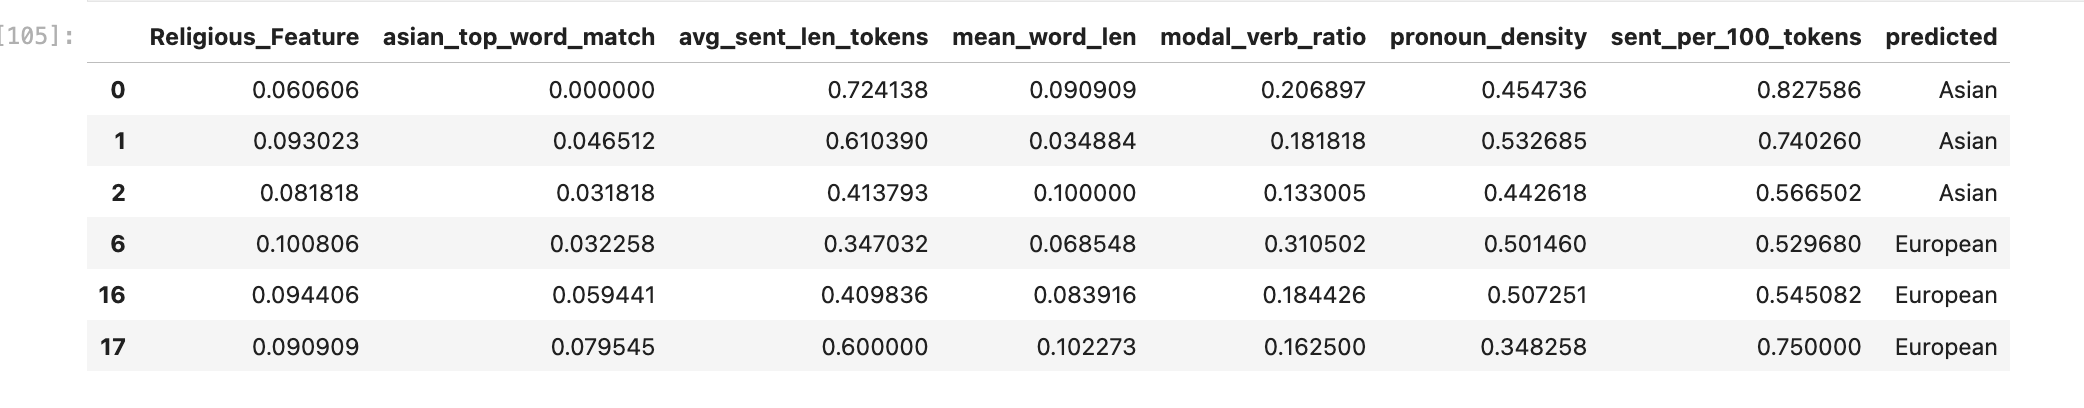

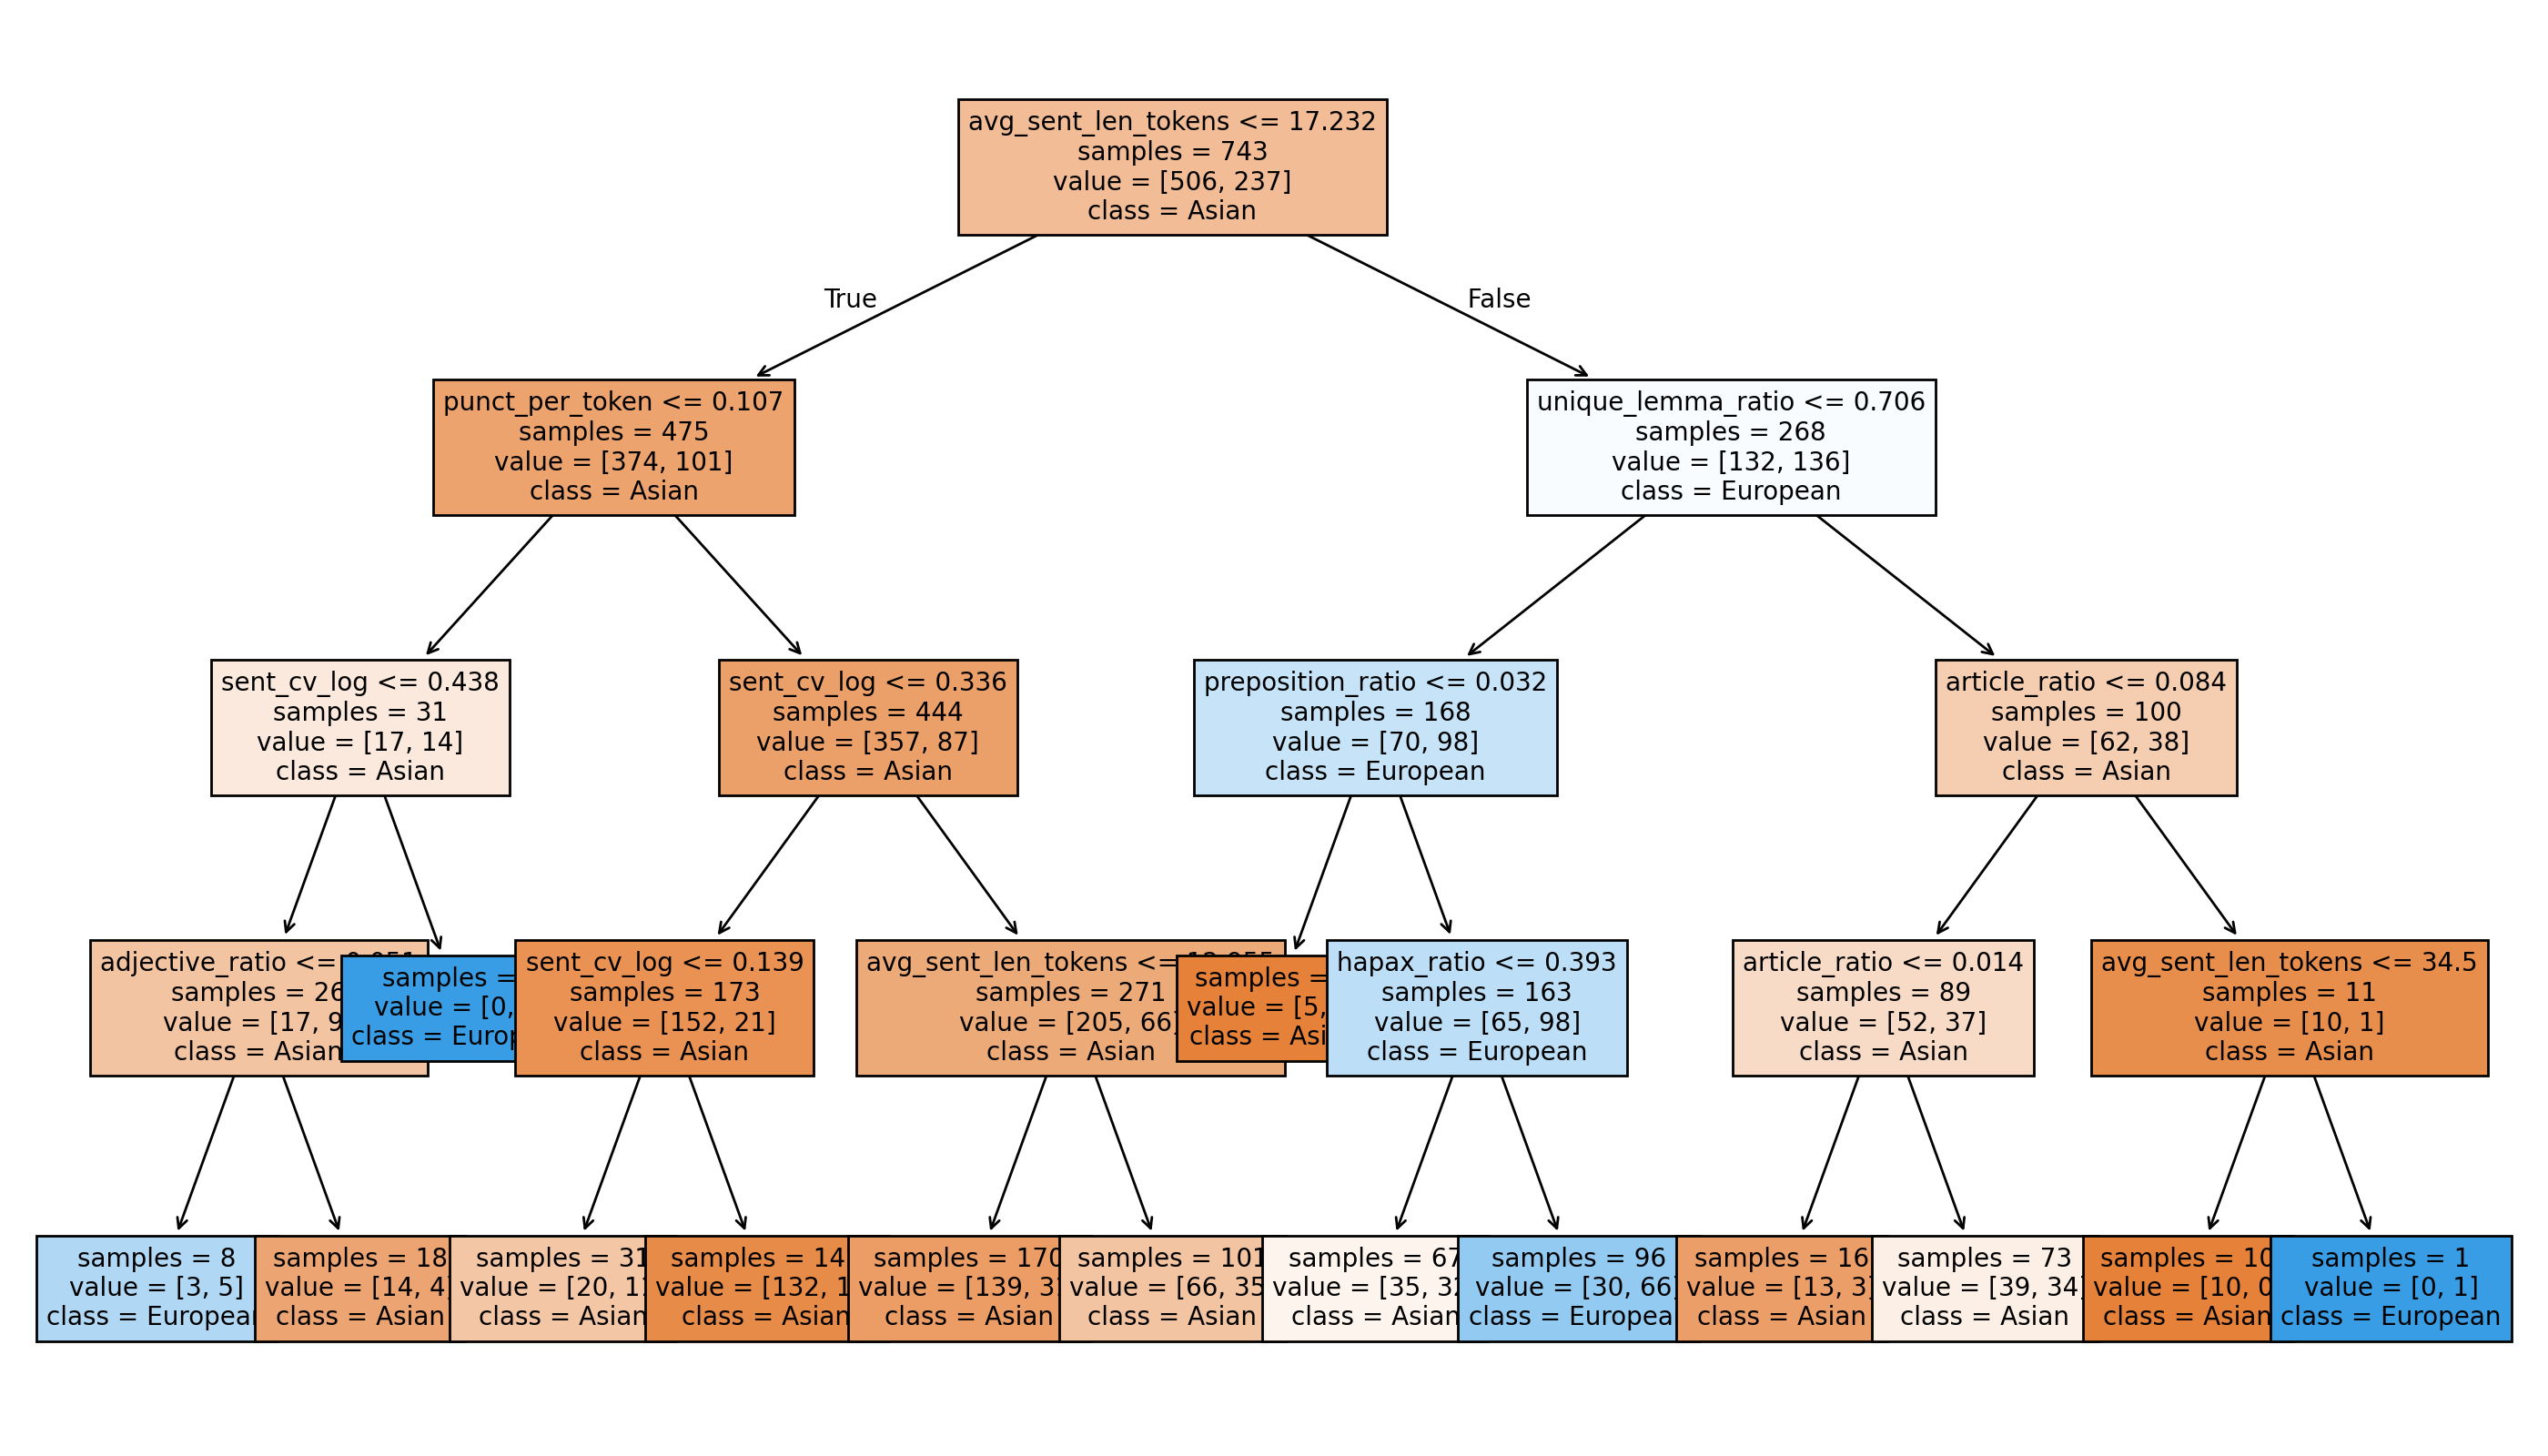

From the above dataframe, we provided 6 examples from our model that misclassified the L1 writer. The top three were predicted to be Asian but actually European. And the Last three were predicted to be European but actually Asian. Below are our hypotheses on why the misclassification happened.

Should be European but predicted to be Asian: 
These three European examples are misclassified as Asian because the decision tree uses mean_word_len as its root node feature, splitting at ≤ 0.101, based on the linguistic pattern that Asian language writers typically use shorter words (due to their native languages' compact character-based systems) compared to European writers who favor longer words with more complex morphology. All three misclassified examples have unusually short mean word lengths (0.024-0.100), causing them to take the left branch at the root node; they then proceed down the right sub-branch (due to avg_sent_len_tokens > 0.107) and ultimately reach terminal nodes that predict "Asian." The core issue is that these European texts exhibit anomalously short word lengths that are atypical for European writers but indistinguishable from Asian writers based on this feature alone—likely due to simplified vocabulary, high use of short function words ("a," "the," "to," "is").

Should be Asian predicted EU
Row 6 is misclassified because it follows a decision path dominated by sentence length and content neutrality rather than Asian-specific lexical cues. After passing the root split on mean word length, the instance falls into the branch where average sentence length is very short, and religious and Asian-top-word features are below their thresholds. This routes the essay into a leaf dominated by European examples. Although the writer is Asian, the combination of low sentence density, minimal topical markers, and relatively high modal verb usage aligns more closely with the European training distribution, causing the model to assign a European label.

Row 16 is misclassified because its feature values fall directly within the overlap region of the decision tree’s mid-level splits. The instance satisfies the root condition for Asian-like word length but does not exceed the thresholds for either sentence length or hapax ratio strongly enough to push it into a clearly Asian-dominated branch. As a result, the tree routes the document into a small European-leaning leaf. With the tree’s limited depth, the model cannot combine multiple weak Asian indicators and instead defaults to the majority class in that region.

Row 17 is misclassified due to a strong lexical-level override in the decision tree. Although its sentence-level features (e.g., sentence density) resemble typical Asian writing patterns, the instance is routed early based on higher average word length and lower pronoun density, which are features the model associates with European essays. These splits occur higher in the tree and dominate the decision path, preventing later sentence-based cues from correcting the classification. This suggests the model interprets the text as stylistically European due to its formal lexical register.


>**Feature Selection and Optimization**

For Part 5 challenging part, we aim to use less features to obtain a higher validation score. Hence, the first step we did is to optimize the hyperparameters of the decision tree model. We use GridSearchCV instead of RandomSearchCV because the hyperparameters for the tree model are all in a small range otherwise overfit. The hyperparameters we care about are max_depth, min_samples_split, min_samples_leaf, max_features, criterion, and class_weight, the final report shows that
```python
best_estimator_: DecisionTreeClassifier
DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features='sqrt',
                       min_samples_leaf=20, min_samples_split=50,
                       random_state=521)
```
Furthermore, we used RFECV to implement feature selection since RFECV aims to select a subset of features that maximizes cross-validated model performance, while eliminating features recursively.

With all the process, we have our tree model with 0.732 accuracy on the dev set and 0.706 accuracy on the test set.
